### Import libraries

In [27]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt

*Import data*


In [14]:
concrete_data = pd.read_csv('concrete_data.csv')
concrete_data.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


Clear data

In [15]:
concrete_data.isnull().sum()

Cement                0
Blast Furnace Slag    0
Fly Ash               0
Water                 0
Superplasticizer      0
Coarse Aggregate      0
Fine Aggregate        0
Age                   0
Strength              0
dtype: int64

#### Split data into predictors (X) and target (y)

In [16]:
concrete_data_columns = concrete_data.columns
predictors = concrete_data[concrete_data_columns[concrete_data_columns != 'Strength']] # all columns except Strength
target = concrete_data['Strength'] # Strength column

In [17]:
predictors.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360


In [18]:
target.head()

0    79.99
1    61.89
2    40.27
3    41.05
4    44.30
Name: Strength, dtype: float64

### Build a Neural Network

In [19]:
# define regression model
''' This function create a model were all hidden layers have the same configuration'''
def regression_model(layers, neurons, n_cols, activation, optimizer, loss):
    # create model
    model = Sequential()
    for i in range(layers):
        model.add(Dense(neurons, activation=activation, input_shape=(n_cols,)))
    model.add(Dense(1))
    print(f"Layers created: {i+1}")
    # compile model
    model.compile(optimizer=optimizer, loss=loss)
    return model

In [26]:
# build the model
n_cols = predictors.shape[1] # number of predictors
layers = 1
neurons = 10
model = regression_model(
    layers = layers,
    neurons = neurons,
    n_cols = n_cols,
    activation = "relu",
    optimizer = "adam",
    loss = "mean_squared_error",
)
model

Layers created: 1


1. Randomly split the data into a training and test sets by holding 30% of the data for testing. 

In [21]:
X_train, X_test, y_train, y_test = train_test_split(predictors, target, test_size=0.3, random_state=42)

2. Train the model on the training data using 50 epochs

In [22]:
# fit the model
epochs = 50
model.fit(X_train, y_train, validation_split=0.3, epochs=epochs, verbose=2)

Epoch 1/50
16/16 - 1s - loss: 334162.9375 - val_loss: 255285.9219 - 878ms/epoch - 55ms/step
Epoch 2/50
16/16 - 0s - loss: 208551.4375 - val_loss: 150254.0781 - 64ms/epoch - 4ms/step
Epoch 3/50
16/16 - 0s - loss: 120742.2422 - val_loss: 81671.4219 - 73ms/epoch - 5ms/step
Epoch 4/50
16/16 - 0s - loss: 65376.6914 - val_loss: 42777.7031 - 57ms/epoch - 4ms/step
Epoch 5/50
16/16 - 0s - loss: 35562.3398 - val_loss: 23136.5820 - 59ms/epoch - 4ms/step
Epoch 6/50
16/16 - 0s - loss: 20896.6621 - val_loss: 15042.8799 - 57ms/epoch - 4ms/step
Epoch 7/50
16/16 - 0s - loss: 15298.7861 - val_loss: 12416.3193 - 56ms/epoch - 4ms/step
Epoch 8/50
16/16 - 0s - loss: 13438.8008 - val_loss: 11638.4502 - 64ms/epoch - 4ms/step
Epoch 9/50
16/16 - 0s - loss: 12658.4961 - val_loss: 11050.8027 - 78ms/epoch - 5ms/step
Epoch 10/50
16/16 - 0s - loss: 11895.7412 - val_loss: 10299.7520 - 81ms/epoch - 5ms/step
Epoch 11/50
16/16 - 0s - loss: 11106.5244 - val_loss: 9638.8350 - 68ms/epoch - 4ms/step
Epoch 12/50
16/16 - 0s -

3. Evaluate the model on the test data and compute the mean squared error between the predicted concrete strength and the actual concrete strength.

In [23]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"The mean squared error is {mse}")

10/10 [==============================] - 0s 2ms/step
The mean squared error is 489.9660112244174


4. Repeat steps 1 - 3, 50 times, i.e., create a list of 50 mean squared errors.

In [24]:
epochs = 50
mse_list = []
for j in range(50):
    print(f"Cicle N: {j+1}")
    X_train, X_test, y_train, y_test = train_test_split(predictors, target, test_size=0.3, random_state=42)
    model.fit(X_train, y_train, epochs=epochs, verbose=0)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mse_list.append(mse)

Cicle N: 1
10/10 [==============================] - 0s 1ms/step
Cicle N: 2
10/10 [==============================] - 0s 2ms/step
Cicle N: 3
10/10 [==============================] - 0s 2ms/step
Cicle N: 4
10/10 [==============================] - 0s 2ms/step
Cicle N: 5
10/10 [==============================] - 0s 1ms/step
Cicle N: 6
10/10 [==============================] - 0s 2ms/step
Cicle N: 7
10/10 [==============================] - 0s 1ms/step
Cicle N: 8
10/10 [==============================] - 0s 2ms/step
Cicle N: 9
10/10 [==============================] - 0s 2ms/step
Cicle N: 10
10/10 [==============================] - 0s 2ms/step
Cicle N: 11
10/10 [==============================] - 0s 2ms/step
Cicle N: 12
10/10 [==============================] - 0s 2ms/step
Cicle N: 13
10/10 [==============================] - 0s 1ms/step
Cicle N: 14
10/10 [==============================] - 0s 2ms/step
Cicle N: 15
10/10 [==============================] - 0s 2ms/step
Cicle N: 16
10/10 [===============

5. Report the mean and the standard deviation of the mean squared errors.

In [25]:
mse_mean = np.mean(mse_list)
mse_std = np.std(mse_list)
print(f"Mean of MSE is: {mse_mean}")
print(f"STD of MSE is: {mse_std}")

Mean of MSE is: 111.81600611235517
STD of MSE is: 5.1043478112876155


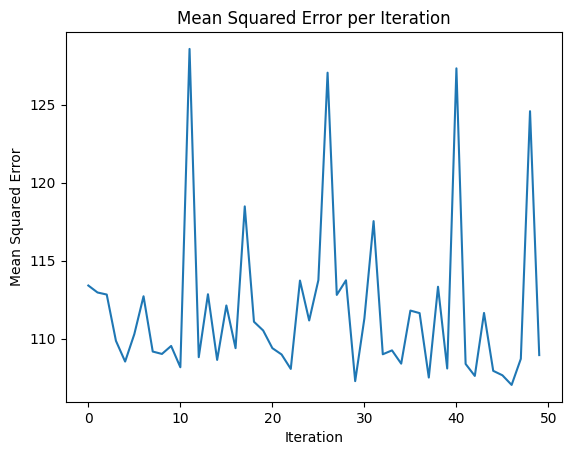

In [28]:
plt.plot(mse_list)
plt.xlabel('Iteration')
plt.ylabel('Mean Squared Error')
plt.title('Mean Squared Error per Iteration')
plt.show()

### Thank you for check my activity!

This notebook was created by [Daniel Sanchez](www.linkedin.com/in/cesar-daniel-sanchez).